# Training Loss Curve Visualization

This notebook plots the training loss curve with 30-step moving average smoothing.


In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


In [9]:
# Load training losses from JSON file
loss_file = "results/checkpoints/training_losses_20251023_223242.json"

with open(loss_file, 'r') as f:
    training_losses = json.load(f)

print(f"Loaded {len(training_losses)} training loss values")
print(f"First 10 values: {training_losses[:10]}")
print(f"Last 10 values: {training_losses[-10:]}")


Loaded 30000 training loss values
First 10 values: [4.638456344604492, 4.438528060913086, 4.27653694152832, 4.158424377441406, 4.037811756134033, 3.905949354171753, 3.8465332984924316, 3.6930270195007324, 3.651766061782837, 3.5084426403045654]
Last 10 values: [1.8386447429656982, 1.5197252035140991, 1.52121901512146, 1.6296297311782837, 1.5693809986114502, 1.632074236869812, 1.5225781202316284, 1.5749101638793945, 1.5234200954437256, 1.5730928182601929]


In [10]:
def moving_average(data, window_size):
    """Calculate moving average with specified window size"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Calculate 30-step moving average
window_size = 300
smoothed_losses = moving_average(training_losses, window_size)

# Create step numbers for plotting
steps = np.arange(len(training_losses))
smoothed_steps = np.arange(window_size-1, len(training_losses))

print(f"Original data points: {len(training_losses)}")
print(f"Smoothed data points: {len(smoothed_losses)}")
print(f"Window size: {window_size}")


Original data points: 30000
Smoothed data points: 29701
Window size: 300


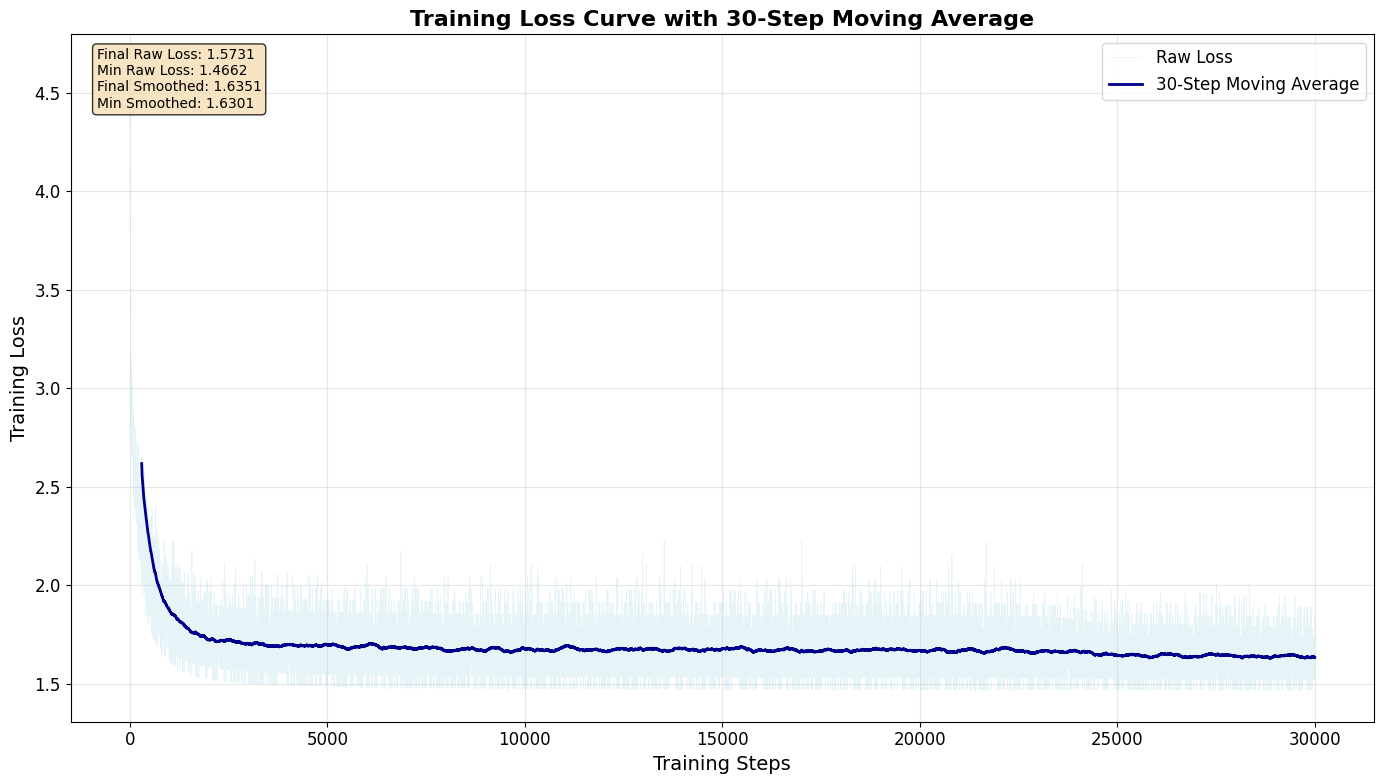

In [11]:
# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot raw training losses (semi-transparent)
ax.plot(steps, training_losses, alpha=0.3, color='lightblue', linewidth=0.5, label='Raw Loss')

# Plot smoothed training losses
ax.plot(smoothed_steps, smoothed_losses, color='darkblue', linewidth=2, label=f'30-Step Moving Average')

# Customize the plot
ax.set_xlabel('Training Steps', fontsize=14)
ax.set_ylabel('Training Loss', fontsize=14)
ax.set_title('Training Loss Curve with 30-Step Moving Average', fontsize=16, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# Add some statistics
final_loss = training_losses[-1]
min_loss = min(training_losses)
final_smoothed = smoothed_losses[-1]
min_smoothed = min(smoothed_losses)

# Add text box with statistics
stats_text = f'Final Raw Loss: {final_loss:.4f}\nMin Raw Loss: {min_loss:.4f}\nFinal Smoothed: {final_smoothed:.4f}\nMin Smoothed: {min_smoothed:.4f}'
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()


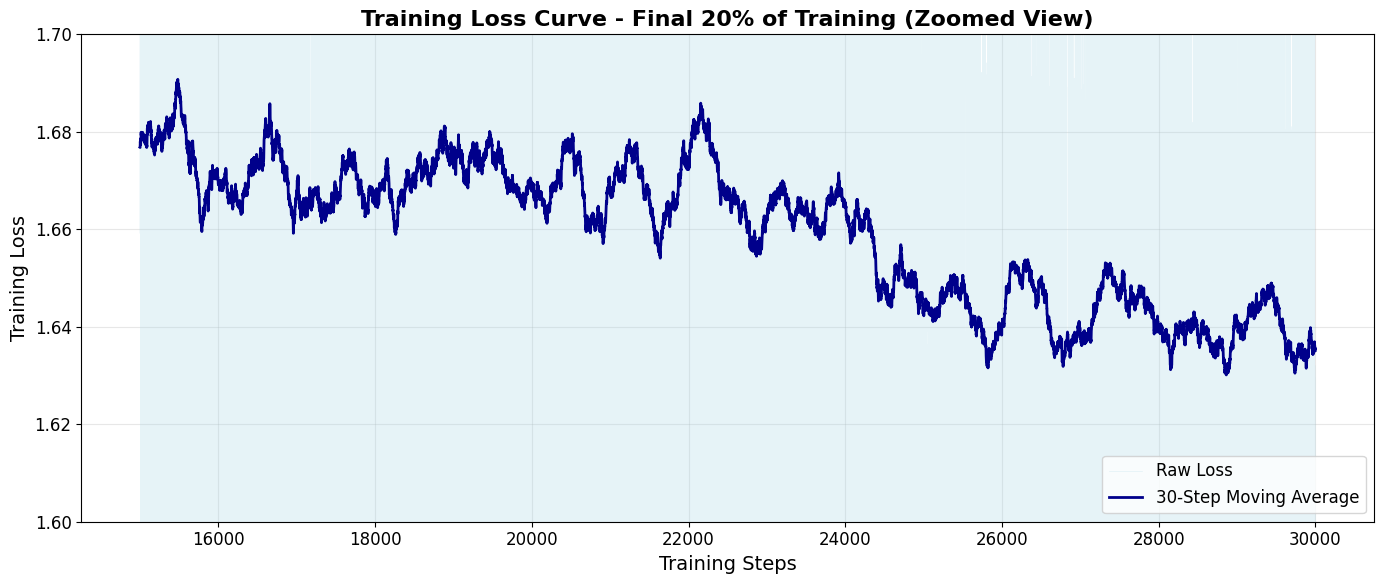

In [14]:
# Optional: Create a zoomed-in view of the later training steps
fig, ax = plt.subplots(figsize=(14, 6))

# Show only the last 20% of training
start_idx = int(0.5 * len(training_losses))
zoom_steps = steps[start_idx:]
zoom_losses = training_losses[start_idx:]
zoom_smoothed_steps = smoothed_steps[smoothed_steps >= start_idx]
zoom_smoothed_losses = smoothed_losses[smoothed_steps >= start_idx]

# Plot zoomed view
ax.plot(zoom_steps, zoom_losses, alpha=0.3, color='lightblue', linewidth=0.5, label='Raw Loss')
ax.plot(zoom_smoothed_steps, zoom_smoothed_losses, color='darkblue', linewidth=2, label='30-Step Moving Average')

ax.set_xlabel('Training Steps', fontsize=14)
ax.set_ylabel('Training Loss', fontsize=14)
ax.set_title('Training Loss Curve - Final 20% of Training (Zoomed View)', fontsize=16, fontweight='bold')
ax.set_ylim(1.6, 1.7)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
